In [15]:
import numpy as np
import pandas as pd
import os
import math
import random 
import cv2 as cv

from scipy import stats #Analysis 
from scipy.stats import norm 

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

1. Data Load
치매 예방을 위한 라이프로그 치매 분류

9,327 rows × 2 columns x 5 picture

For more details https://aihub.or.kr/problem_contest/nipa-learning-platform/6

In [16]:
# original data : data 

path = "./Dataset/pic_dataset"

FAST_RUN = False
IMAGE_WIDTH=34
IMAGE_HEIGHT=34
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=1

filenames = os.listdir(path)
categories = []
sobee = []

# data = cv.imread('/content/gdrive/My Drive/CoLab/Dataset/pic_dataset/CN_0.png', 0)
# img = cv.resize(data, None, fx=28/349, fy=28/231)
# print(img/255)
# print(img.shape)

for filename in filenames:
    category = filename.split('_')[0]
    categories.append(category)
#    if category == 'CN':
#        categories.append(0)
#    elif  category == 'MCI':
#        categories.append(1)
#    else:
#        categories.append(2)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

df

,filename,category
0,CN_0.png,CN
1,CN_1.png,CN
2,CN_10.png,CN
3,CN_1000.png,CN
4,CN_1001.png,CN
...,...,...
9322,MCI_95.png,MCI
9323,MCI_96.png,MCI
9324,MCI_97.png,MCI
9325,MCI_98.png,MCI


In [17]:
df

,filename,category
0,CN_0.png,CN
1,CN_1.png,CN
2,CN_10.png,CN
3,CN_1000.png,CN
4,CN_1001.png,CN
...,...,...
9322,MCI_95.png,MCI
9323,MCI_96.png,MCI
9324,MCI_97.png,MCI
9325,MCI_98.png,MCI


2. EDA
9,327 rows × 66 columns

148명에 대한 데일리 라이프로그 데이터
크게 1. 기본 정보 2. 걸음거리 3.수면 4.컨버팅 데이터로 나눌 수 있겠습니다.

4. converting

CONVERT(activity_class_5min USING utf8)
CONVERT(activity_met_1min USING utf8)
CONVERT(sleep_hr_5min USING utf8)
CONVERT(sleep_hypnogram_5min USING utf8)
CONVERT(sleep_rmssd_5min USING utf8)
y variable

DIAG_NM
정상(CN), 경도인지 장애(MCI), 치매(Dem)

In [18]:
df.shape

(9327, 2)

In [19]:
y_data = df['category'].copy()

In [20]:
for i in range(len(filenames)):
  mypath = path + '/' + filenames[i]
  print(mypath)
  data = cv.imread(mypath, 0)
  img = cv.resize(data, None, fx=28/349, fy=28/231)
  img = img/255
  sobee.append(img)

./Dataset/pic_dataset/CN_0.png
./Dataset/pic_dataset/CN_1.png
./Dataset/pic_dataset/CN_10.png
./Dataset/pic_dataset/CN_1000.png
./Dataset/pic_dataset/CN_1001.png
./Dataset/pic_dataset/CN_1002.png
./Dataset/pic_dataset/CN_1003.png
./Dataset/pic_dataset/CN_1004.png
./Dataset/pic_dataset/CN_1005.png
./Dataset/pic_dataset/CN_1006.png
./Dataset/pic_dataset/CN_1007.png
./Dataset/pic_dataset/CN_1008.png
./Dataset/pic_dataset/CN_1009.png
./Dataset/pic_dataset/CN_1010.png
./Dataset/pic_dataset/CN_1011.png
./Dataset/pic_dataset/CN_1012.png
./Dataset/pic_dataset/CN_1013.png
./Dataset/pic_dataset/CN_1014.png
./Dataset/pic_dataset/CN_1015.png
./Dataset/pic_dataset/CN_1016.png
./Dataset/pic_dataset/CN_1017.png
./Dataset/pic_dataset/CN_1018.png
./Dataset/pic_dataset/CN_1019.png
./Dataset/pic_dataset/CN_1020.png
./Dataset/pic_dataset/CN_1021.png
./Dataset/pic_dataset/CN_1022.png
./Dataset/pic_dataset/CN_1023.png
./Dataset/pic_dataset/CN_1024.png
./Dataset/pic_dataset/CN_1025.png
./Dataset/pic_dataset/

./Dataset/pic_dataset/CN_171.png
./Dataset/pic_dataset/CN_1710.png
./Dataset/pic_dataset/CN_1711.png
./Dataset/pic_dataset/CN_1712.png
./Dataset/pic_dataset/CN_1713.png
./Dataset/pic_dataset/CN_1714.png
./Dataset/pic_dataset/CN_1715.png
./Dataset/pic_dataset/CN_1716.png
./Dataset/pic_dataset/CN_1717.png
./Dataset/pic_dataset/CN_1718.png
./Dataset/pic_dataset/CN_1719.png
./Dataset/pic_dataset/CN_172.png
./Dataset/pic_dataset/CN_1720.png
./Dataset/pic_dataset/CN_1721.png
./Dataset/pic_dataset/CN_1722.png
./Dataset/pic_dataset/CN_1723.png
./Dataset/pic_dataset/CN_1724.png
./Dataset/pic_dataset/CN_1725.png
./Dataset/pic_dataset/CN_1726.png
./Dataset/pic_dataset/CN_1727.png
./Dataset/pic_dataset/CN_1728.png
./Dataset/pic_dataset/CN_1729.png
./Dataset/pic_dataset/CN_173.png
./Dataset/pic_dataset/CN_1730.png
./Dataset/pic_dataset/CN_1731.png
./Dataset/pic_dataset/CN_1732.png
./Dataset/pic_dataset/CN_1733.png
./Dataset/pic_dataset/CN_1734.png
./Dataset/pic_dataset/CN_1735.png
./Dataset/pic_dat

./Dataset/pic_dataset/CN_2264.png
./Dataset/pic_dataset/CN_2265.png
./Dataset/pic_dataset/CN_2266.png
./Dataset/pic_dataset/CN_2267.png
./Dataset/pic_dataset/CN_2268.png
./Dataset/pic_dataset/CN_2269.png
./Dataset/pic_dataset/CN_2270.png
./Dataset/pic_dataset/CN_2271.png
./Dataset/pic_dataset/CN_2272.png
./Dataset/pic_dataset/CN_2273.png
./Dataset/pic_dataset/CN_2274.png
./Dataset/pic_dataset/CN_2275.png
./Dataset/pic_dataset/CN_2276.png
./Dataset/pic_dataset/CN_2277.png
./Dataset/pic_dataset/CN_2278.png
./Dataset/pic_dataset/CN_2279.png
./Dataset/pic_dataset/CN_2280.png
./Dataset/pic_dataset/CN_2281.png
./Dataset/pic_dataset/CN_2282.png
./Dataset/pic_dataset/CN_2283.png
./Dataset/pic_dataset/CN_2284.png
./Dataset/pic_dataset/CN_2285.png
./Dataset/pic_dataset/CN_2286.png
./Dataset/pic_dataset/CN_2287.png
./Dataset/pic_dataset/CN_2288.png
./Dataset/pic_dataset/CN_2289.png
./Dataset/pic_dataset/CN_2290.png
./Dataset/pic_dataset/CN_2291.png
./Dataset/pic_dataset/CN_2292.png
./Dataset/pic_

./Dataset/pic_dataset/CN_2608.png
./Dataset/pic_dataset/CN_2609.png
./Dataset/pic_dataset/CN_2610.png
./Dataset/pic_dataset/CN_2611.png
./Dataset/pic_dataset/CN_2612.png
./Dataset/pic_dataset/CN_2613.png
./Dataset/pic_dataset/CN_2614.png
./Dataset/pic_dataset/CN_2615.png
./Dataset/pic_dataset/CN_2616.png
./Dataset/pic_dataset/CN_2617.png
./Dataset/pic_dataset/CN_2618.png
./Dataset/pic_dataset/CN_2619.png
./Dataset/pic_dataset/CN_2620.png
./Dataset/pic_dataset/CN_2621.png
./Dataset/pic_dataset/CN_2622.png
./Dataset/pic_dataset/CN_2623.png
./Dataset/pic_dataset/CN_2624.png
./Dataset/pic_dataset/CN_2625.png
./Dataset/pic_dataset/CN_2626.png
./Dataset/pic_dataset/CN_2627.png
./Dataset/pic_dataset/CN_2628.png
./Dataset/pic_dataset/CN_2629.png
./Dataset/pic_dataset/CN_2630.png
./Dataset/pic_dataset/CN_2631.png
./Dataset/pic_dataset/CN_2632.png
./Dataset/pic_dataset/CN_2633.png
./Dataset/pic_dataset/CN_2634.png
./Dataset/pic_dataset/CN_2635.png
./Dataset/pic_dataset/CN_2636.png
./Dataset/pic_

./Dataset/pic_dataset/CN_293.png
./Dataset/pic_dataset/CN_2930.png
./Dataset/pic_dataset/CN_2931.png
./Dataset/pic_dataset/CN_2932.png
./Dataset/pic_dataset/CN_2933.png
./Dataset/pic_dataset/CN_2934.png
./Dataset/pic_dataset/CN_2935.png
./Dataset/pic_dataset/CN_2936.png
./Dataset/pic_dataset/CN_2937.png
./Dataset/pic_dataset/CN_2938.png
./Dataset/pic_dataset/CN_2939.png
./Dataset/pic_dataset/CN_294.png
./Dataset/pic_dataset/CN_2940.png
./Dataset/pic_dataset/CN_2941.png
./Dataset/pic_dataset/CN_2942.png
./Dataset/pic_dataset/CN_2943.png
./Dataset/pic_dataset/CN_2944.png
./Dataset/pic_dataset/CN_2945.png
./Dataset/pic_dataset/CN_2946.png
./Dataset/pic_dataset/CN_2947.png
./Dataset/pic_dataset/CN_2948.png
./Dataset/pic_dataset/CN_2949.png
./Dataset/pic_dataset/CN_295.png
./Dataset/pic_dataset/CN_2950.png
./Dataset/pic_dataset/CN_2951.png
./Dataset/pic_dataset/CN_2952.png
./Dataset/pic_dataset/CN_2953.png
./Dataset/pic_dataset/CN_2954.png
./Dataset/pic_dataset/CN_2955.png
./Dataset/pic_dat

./Dataset/pic_dataset/CN_3417.png
./Dataset/pic_dataset/CN_3418.png
./Dataset/pic_dataset/CN_3419.png
./Dataset/pic_dataset/CN_3420.png
./Dataset/pic_dataset/CN_3421.png
./Dataset/pic_dataset/CN_3422.png
./Dataset/pic_dataset/CN_3423.png
./Dataset/pic_dataset/CN_3424.png
./Dataset/pic_dataset/CN_3425.png
./Dataset/pic_dataset/CN_3426.png
./Dataset/pic_dataset/CN_3427.png
./Dataset/pic_dataset/CN_3428.png
./Dataset/pic_dataset/CN_3429.png
./Dataset/pic_dataset/CN_3430.png
./Dataset/pic_dataset/CN_3431.png
./Dataset/pic_dataset/CN_3432.png
./Dataset/pic_dataset/CN_3433.png
./Dataset/pic_dataset/CN_3434.png
./Dataset/pic_dataset/CN_3435.png
./Dataset/pic_dataset/CN_3436.png
./Dataset/pic_dataset/CN_3437.png
./Dataset/pic_dataset/CN_3438.png
./Dataset/pic_dataset/CN_3439.png
./Dataset/pic_dataset/CN_3440.png
./Dataset/pic_dataset/CN_3441.png
./Dataset/pic_dataset/CN_3442.png
./Dataset/pic_dataset/CN_3443.png
./Dataset/pic_dataset/CN_3444.png
./Dataset/pic_dataset/CN_3445.png
./Dataset/pic_

./Dataset/pic_dataset/CN_3976.png
./Dataset/pic_dataset/CN_3977.png
./Dataset/pic_dataset/CN_3978.png
./Dataset/pic_dataset/CN_3979.png
./Dataset/pic_dataset/CN_398.png
./Dataset/pic_dataset/CN_3980.png
./Dataset/pic_dataset/CN_3981.png
./Dataset/pic_dataset/CN_3982.png
./Dataset/pic_dataset/CN_3983.png
./Dataset/pic_dataset/CN_3984.png
./Dataset/pic_dataset/CN_3985.png
./Dataset/pic_dataset/CN_3986.png
./Dataset/pic_dataset/CN_3987.png
./Dataset/pic_dataset/CN_3988.png
./Dataset/pic_dataset/CN_3989.png
./Dataset/pic_dataset/CN_399.png
./Dataset/pic_dataset/CN_3990.png
./Dataset/pic_dataset/CN_3991.png
./Dataset/pic_dataset/CN_3992.png
./Dataset/pic_dataset/CN_3993.png
./Dataset/pic_dataset/CN_3994.png
./Dataset/pic_dataset/CN_3995.png
./Dataset/pic_dataset/CN_3996.png
./Dataset/pic_dataset/CN_3997.png
./Dataset/pic_dataset/CN_3998.png
./Dataset/pic_dataset/CN_3999.png
./Dataset/pic_dataset/CN_4.png
./Dataset/pic_dataset/CN_40.png
./Dataset/pic_dataset/CN_400.png
./Dataset/pic_dataset/

./Dataset/pic_dataset/CN_4457.png
./Dataset/pic_dataset/CN_4458.png
./Dataset/pic_dataset/CN_4459.png
./Dataset/pic_dataset/CN_446.png
./Dataset/pic_dataset/CN_4460.png
./Dataset/pic_dataset/CN_4461.png
./Dataset/pic_dataset/CN_4462.png
./Dataset/pic_dataset/CN_4463.png
./Dataset/pic_dataset/CN_4464.png
./Dataset/pic_dataset/CN_4465.png
./Dataset/pic_dataset/CN_4466.png
./Dataset/pic_dataset/CN_4467.png
./Dataset/pic_dataset/CN_4468.png
./Dataset/pic_dataset/CN_4469.png
./Dataset/pic_dataset/CN_447.png
./Dataset/pic_dataset/CN_4470.png
./Dataset/pic_dataset/CN_4471.png
./Dataset/pic_dataset/CN_4472.png
./Dataset/pic_dataset/CN_4473.png
./Dataset/pic_dataset/CN_4474.png
./Dataset/pic_dataset/CN_4475.png
./Dataset/pic_dataset/CN_4476.png
./Dataset/pic_dataset/CN_4477.png
./Dataset/pic_dataset/CN_4478.png
./Dataset/pic_dataset/CN_4479.png
./Dataset/pic_dataset/CN_448.png
./Dataset/pic_dataset/CN_4480.png
./Dataset/pic_dataset/CN_4481.png
./Dataset/pic_dataset/CN_4482.png
./Dataset/pic_dat

./Dataset/pic_dataset/CN_5042.png
./Dataset/pic_dataset/CN_5043.png
./Dataset/pic_dataset/CN_5044.png
./Dataset/pic_dataset/CN_5045.png
./Dataset/pic_dataset/CN_5046.png
./Dataset/pic_dataset/CN_5047.png
./Dataset/pic_dataset/CN_5048.png
./Dataset/pic_dataset/CN_5049.png
./Dataset/pic_dataset/CN_5050.png
./Dataset/pic_dataset/CN_5051.png
./Dataset/pic_dataset/CN_5052.png
./Dataset/pic_dataset/CN_5053.png
./Dataset/pic_dataset/CN_5054.png
./Dataset/pic_dataset/CN_5055.png
./Dataset/pic_dataset/CN_5056.png
./Dataset/pic_dataset/CN_5057.png
./Dataset/pic_dataset/CN_5058.png
./Dataset/pic_dataset/CN_5059.png
./Dataset/pic_dataset/CN_5060.png
./Dataset/pic_dataset/CN_5061.png
./Dataset/pic_dataset/CN_5062.png
./Dataset/pic_dataset/CN_5063.png
./Dataset/pic_dataset/CN_5064.png
./Dataset/pic_dataset/CN_5065.png
./Dataset/pic_dataset/CN_5066.png
./Dataset/pic_dataset/CN_5067.png
./Dataset/pic_dataset/CN_5068.png
./Dataset/pic_dataset/CN_5069.png
./Dataset/pic_dataset/CN_5070.png
./Dataset/pic_

./Dataset/pic_dataset/CN_5601.png
./Dataset/pic_dataset/CN_5602.png
./Dataset/pic_dataset/CN_5603.png
./Dataset/pic_dataset/CN_5604.png
./Dataset/pic_dataset/CN_5605.png
./Dataset/pic_dataset/CN_5606.png
./Dataset/pic_dataset/CN_5607.png
./Dataset/pic_dataset/CN_5608.png
./Dataset/pic_dataset/CN_5609.png
./Dataset/pic_dataset/CN_561.png
./Dataset/pic_dataset/CN_5610.png
./Dataset/pic_dataset/CN_5611.png
./Dataset/pic_dataset/CN_5612.png
./Dataset/pic_dataset/CN_5613.png
./Dataset/pic_dataset/CN_5614.png
./Dataset/pic_dataset/CN_5615.png
./Dataset/pic_dataset/CN_5616.png
./Dataset/pic_dataset/CN_5617.png
./Dataset/pic_dataset/CN_5618.png
./Dataset/pic_dataset/CN_5619.png
./Dataset/pic_dataset/CN_562.png
./Dataset/pic_dataset/CN_5620.png
./Dataset/pic_dataset/CN_5621.png
./Dataset/pic_dataset/CN_5622.png
./Dataset/pic_dataset/CN_5623.png
./Dataset/pic_dataset/CN_5624.png
./Dataset/pic_dataset/CN_5625.png
./Dataset/pic_dataset/CN_5626.png
./Dataset/pic_dataset/CN_5627.png
./Dataset/pic_da

./Dataset/pic_dataset/CN_5998.png
./Dataset/pic_dataset/CN_5999.png
./Dataset/pic_dataset/CN_6.png
./Dataset/pic_dataset/CN_600.png
./Dataset/pic_dataset/CN_6000.png
./Dataset/pic_dataset/CN_6001.png
./Dataset/pic_dataset/CN_6002.png
./Dataset/pic_dataset/CN_6003.png
./Dataset/pic_dataset/CN_6004.png
./Dataset/pic_dataset/CN_6005.png
./Dataset/pic_dataset/CN_6006.png
./Dataset/pic_dataset/CN_6007.png
./Dataset/pic_dataset/CN_6008.png
./Dataset/pic_dataset/CN_6009.png
./Dataset/pic_dataset/CN_601.png
./Dataset/pic_dataset/CN_6010.png
./Dataset/pic_dataset/CN_6011.png
./Dataset/pic_dataset/CN_6012.png
./Dataset/pic_dataset/CN_6013.png
./Dataset/pic_dataset/CN_6014.png
./Dataset/pic_dataset/CN_6015.png
./Dataset/pic_dataset/CN_6016.png
./Dataset/pic_dataset/CN_6017.png
./Dataset/pic_dataset/CN_6018.png
./Dataset/pic_dataset/CN_6019.png
./Dataset/pic_dataset/CN_602.png
./Dataset/pic_dataset/CN_6020.png
./Dataset/pic_dataset/CN_6021.png
./Dataset/pic_dataset/CN_603.png
./Dataset/pic_dataset

./Dataset/pic_dataset/CN_6574.png
./Dataset/pic_dataset/CN_6575.png
./Dataset/pic_dataset/CN_6576.png
./Dataset/pic_dataset/CN_6577.png
./Dataset/pic_dataset/CN_6578.png
./Dataset/pic_dataset/CN_6579.png
./Dataset/pic_dataset/CN_6580.png
./Dataset/pic_dataset/CN_6581.png
./Dataset/pic_dataset/CN_6582.png
./Dataset/pic_dataset/CN_6583.png
./Dataset/pic_dataset/CN_6584.png
./Dataset/pic_dataset/CN_6585.png
./Dataset/pic_dataset/CN_6586.png
./Dataset/pic_dataset/CN_6587.png
./Dataset/pic_dataset/CN_6588.png
./Dataset/pic_dataset/CN_6589.png
./Dataset/pic_dataset/CN_6590.png
./Dataset/pic_dataset/CN_6591.png
./Dataset/pic_dataset/CN_6592.png
./Dataset/pic_dataset/CN_6593.png
./Dataset/pic_dataset/CN_6594.png
./Dataset/pic_dataset/CN_6595.png
./Dataset/pic_dataset/CN_6596.png
./Dataset/pic_dataset/CN_6597.png
./Dataset/pic_dataset/CN_6598.png
./Dataset/pic_dataset/CN_6599.png
./Dataset/pic_dataset/CN_6600.png
./Dataset/pic_dataset/CN_6601.png
./Dataset/pic_dataset/CN_6602.png
./Dataset/pic_

./Dataset/pic_dataset/CN_7391.png
./Dataset/pic_dataset/CN_7392.png
./Dataset/pic_dataset/CN_7393.png
./Dataset/pic_dataset/CN_7394.png
./Dataset/pic_dataset/CN_7395.png
./Dataset/pic_dataset/CN_7396.png
./Dataset/pic_dataset/CN_7397.png
./Dataset/pic_dataset/CN_7398.png
./Dataset/pic_dataset/CN_7399.png
./Dataset/pic_dataset/CN_7400.png
./Dataset/pic_dataset/CN_7401.png
./Dataset/pic_dataset/CN_7402.png
./Dataset/pic_dataset/CN_7403.png
./Dataset/pic_dataset/CN_7404.png
./Dataset/pic_dataset/CN_7405.png
./Dataset/pic_dataset/CN_7406.png
./Dataset/pic_dataset/CN_7407.png
./Dataset/pic_dataset/CN_7408.png
./Dataset/pic_dataset/CN_7409.png
./Dataset/pic_dataset/CN_7410.png
./Dataset/pic_dataset/CN_7411.png
./Dataset/pic_dataset/CN_7412.png
./Dataset/pic_dataset/CN_7413.png
./Dataset/pic_dataset/CN_7414.png
./Dataset/pic_dataset/CN_7415.png
./Dataset/pic_dataset/CN_7416.png
./Dataset/pic_dataset/CN_7417.png
./Dataset/pic_dataset/CN_7418.png
./Dataset/pic_dataset/CN_7419.png
./Dataset/pic_

./Dataset/pic_dataset/CN_790.png
./Dataset/pic_dataset/CN_791.png
./Dataset/pic_dataset/CN_792.png
./Dataset/pic_dataset/CN_7920.png
./Dataset/pic_dataset/CN_7921.png
./Dataset/pic_dataset/CN_7922.png
./Dataset/pic_dataset/CN_7923.png
./Dataset/pic_dataset/CN_7924.png
./Dataset/pic_dataset/CN_7925.png
./Dataset/pic_dataset/CN_7926.png
./Dataset/pic_dataset/CN_7927.png
./Dataset/pic_dataset/CN_7928.png
./Dataset/pic_dataset/CN_7929.png
./Dataset/pic_dataset/CN_793.png
./Dataset/pic_dataset/CN_7930.png
./Dataset/pic_dataset/CN_7931.png
./Dataset/pic_dataset/CN_7932.png
./Dataset/pic_dataset/CN_7933.png
./Dataset/pic_dataset/CN_7934.png
./Dataset/pic_dataset/CN_7935.png
./Dataset/pic_dataset/CN_7936.png
./Dataset/pic_dataset/CN_7937.png
./Dataset/pic_dataset/CN_7938.png
./Dataset/pic_dataset/CN_7939.png
./Dataset/pic_dataset/CN_794.png
./Dataset/pic_dataset/CN_7940.png
./Dataset/pic_dataset/CN_7941.png
./Dataset/pic_dataset/CN_7942.png
./Dataset/pic_dataset/CN_7943.png
./Dataset/pic_datas

./Dataset/pic_dataset/CN_8414.png
./Dataset/pic_dataset/CN_8415.png
./Dataset/pic_dataset/CN_8416.png
./Dataset/pic_dataset/CN_8417.png
./Dataset/pic_dataset/CN_8418.png
./Dataset/pic_dataset/CN_8419.png
./Dataset/pic_dataset/CN_842.png
./Dataset/pic_dataset/CN_8420.png
./Dataset/pic_dataset/CN_8421.png
./Dataset/pic_dataset/CN_8422.png
./Dataset/pic_dataset/CN_8423.png
./Dataset/pic_dataset/CN_8424.png
./Dataset/pic_dataset/CN_8425.png
./Dataset/pic_dataset/CN_8426.png
./Dataset/pic_dataset/CN_8427.png
./Dataset/pic_dataset/CN_8428.png
./Dataset/pic_dataset/CN_8429.png
./Dataset/pic_dataset/CN_843.png
./Dataset/pic_dataset/CN_8430.png
./Dataset/pic_dataset/CN_8431.png
./Dataset/pic_dataset/CN_8432.png
./Dataset/pic_dataset/CN_8433.png
./Dataset/pic_dataset/CN_8434.png
./Dataset/pic_dataset/CN_8435.png
./Dataset/pic_dataset/CN_8436.png
./Dataset/pic_dataset/CN_8437.png
./Dataset/pic_dataset/CN_8438.png
./Dataset/pic_dataset/CN_8439.png
./Dataset/pic_dataset/CN_844.png
./Dataset/pic_dat

./Dataset/pic_dataset/CN_8794.png
./Dataset/pic_dataset/CN_8795.png
./Dataset/pic_dataset/CN_8796.png
./Dataset/pic_dataset/CN_8797.png
./Dataset/pic_dataset/CN_8798.png
./Dataset/pic_dataset/CN_8799.png
./Dataset/pic_dataset/CN_880.png
./Dataset/pic_dataset/CN_8800.png
./Dataset/pic_dataset/CN_8801.png
./Dataset/pic_dataset/CN_8802.png
./Dataset/pic_dataset/CN_8803.png
./Dataset/pic_dataset/CN_8804.png
./Dataset/pic_dataset/CN_8805.png
./Dataset/pic_dataset/CN_8806.png
./Dataset/pic_dataset/CN_8807.png
./Dataset/pic_dataset/CN_8808.png
./Dataset/pic_dataset/CN_8809.png
./Dataset/pic_dataset/CN_881.png
./Dataset/pic_dataset/CN_8810.png
./Dataset/pic_dataset/CN_8811.png
./Dataset/pic_dataset/CN_8812.png
./Dataset/pic_dataset/CN_8813.png
./Dataset/pic_dataset/CN_8814.png
./Dataset/pic_dataset/CN_8815.png
./Dataset/pic_dataset/CN_8816.png
./Dataset/pic_dataset/CN_8817.png
./Dataset/pic_dataset/CN_8818.png
./Dataset/pic_dataset/CN_8819.png
./Dataset/pic_dataset/CN_882.png
./Dataset/pic_dat

./Dataset/pic_dataset/CN_9121.png
./Dataset/pic_dataset/CN_9122.png
./Dataset/pic_dataset/CN_9123.png
./Dataset/pic_dataset/CN_9124.png
./Dataset/pic_dataset/CN_9125.png
./Dataset/pic_dataset/CN_9126.png
./Dataset/pic_dataset/CN_9127.png
./Dataset/pic_dataset/CN_9128.png
./Dataset/pic_dataset/CN_9129.png
./Dataset/pic_dataset/CN_913.png
./Dataset/pic_dataset/CN_9130.png
./Dataset/pic_dataset/CN_9131.png
./Dataset/pic_dataset/CN_9132.png
./Dataset/pic_dataset/CN_9133.png
./Dataset/pic_dataset/CN_9134.png
./Dataset/pic_dataset/CN_9135.png
./Dataset/pic_dataset/CN_9136.png
./Dataset/pic_dataset/CN_9137.png
./Dataset/pic_dataset/CN_9138.png
./Dataset/pic_dataset/CN_9139.png
./Dataset/pic_dataset/CN_914.png
./Dataset/pic_dataset/CN_9140.png
./Dataset/pic_dataset/CN_9141.png
./Dataset/pic_dataset/CN_9142.png
./Dataset/pic_dataset/CN_9143.png
./Dataset/pic_dataset/CN_9144.png
./Dataset/pic_dataset/CN_9145.png
./Dataset/pic_dataset/CN_9146.png
./Dataset/pic_dataset/CN_9147.png
./Dataset/pic_da

./Dataset/pic_dataset/Dem_1640.png
./Dataset/pic_dataset/Dem_1641.png
./Dataset/pic_dataset/Dem_1642.png
./Dataset/pic_dataset/Dem_1643.png
./Dataset/pic_dataset/Dem_1644.png
./Dataset/pic_dataset/Dem_1645.png
./Dataset/pic_dataset/Dem_1646.png
./Dataset/pic_dataset/Dem_1647.png
./Dataset/pic_dataset/Dem_1648.png
./Dataset/pic_dataset/Dem_1649.png
./Dataset/pic_dataset/Dem_1650.png
./Dataset/pic_dataset/Dem_1651.png
./Dataset/pic_dataset/Dem_1652.png
./Dataset/pic_dataset/Dem_1653.png
./Dataset/pic_dataset/Dem_1654.png
./Dataset/pic_dataset/Dem_1655.png
./Dataset/pic_dataset/Dem_1656.png
./Dataset/pic_dataset/Dem_1657.png
./Dataset/pic_dataset/Dem_1658.png
./Dataset/pic_dataset/Dem_1659.png
./Dataset/pic_dataset/Dem_1660.png
./Dataset/pic_dataset/Dem_1661.png
./Dataset/pic_dataset/Dem_1662.png
./Dataset/pic_dataset/Dem_1663.png
./Dataset/pic_dataset/Dem_1664.png
./Dataset/pic_dataset/Dem_1665.png
./Dataset/pic_dataset/Dem_1666.png
./Dataset/pic_dataset/Dem_1667.png
./Dataset/pic_datase

./Dataset/pic_dataset/Dem_704.png
./Dataset/pic_dataset/Dem_705.png
./Dataset/pic_dataset/Dem_706.png
./Dataset/pic_dataset/Dem_707.png
./Dataset/pic_dataset/Dem_708.png
./Dataset/pic_dataset/Dem_709.png
./Dataset/pic_dataset/Dem_710.png
./Dataset/pic_dataset/Dem_711.png
./Dataset/pic_dataset/Dem_712.png
./Dataset/pic_dataset/Dem_713.png
./Dataset/pic_dataset/Dem_714.png
./Dataset/pic_dataset/Dem_715.png
./Dataset/pic_dataset/Dem_716.png
./Dataset/pic_dataset/Dem_717.png
./Dataset/pic_dataset/Dem_718.png
./Dataset/pic_dataset/Dem_719.png
./Dataset/pic_dataset/Dem_720.png
./Dataset/pic_dataset/Dem_721.png
./Dataset/pic_dataset/Dem_722.png
./Dataset/pic_dataset/Dem_723.png
./Dataset/pic_dataset/Dem_724.png
./Dataset/pic_dataset/Dem_725.png
./Dataset/pic_dataset/Dem_726.png
./Dataset/pic_dataset/Dem_727.png
./Dataset/pic_dataset/Dem_728.png
./Dataset/pic_dataset/Dem_729.png
./Dataset/pic_dataset/Dem_730.png
./Dataset/pic_dataset/Dem_731.png
./Dataset/pic_dataset/Dem_732.png
./Dataset/pic_

./Dataset/pic_dataset/MCI_1155.png
./Dataset/pic_dataset/MCI_1156.png
./Dataset/pic_dataset/MCI_1157.png
./Dataset/pic_dataset/MCI_1158.png
./Dataset/pic_dataset/MCI_1159.png
./Dataset/pic_dataset/MCI_116.png
./Dataset/pic_dataset/MCI_1160.png
./Dataset/pic_dataset/MCI_1161.png
./Dataset/pic_dataset/MCI_1162.png
./Dataset/pic_dataset/MCI_1163.png
./Dataset/pic_dataset/MCI_1164.png
./Dataset/pic_dataset/MCI_1165.png
./Dataset/pic_dataset/MCI_1166.png
./Dataset/pic_dataset/MCI_1167.png
./Dataset/pic_dataset/MCI_1168.png
./Dataset/pic_dataset/MCI_1169.png
./Dataset/pic_dataset/MCI_117.png
./Dataset/pic_dataset/MCI_1170.png
./Dataset/pic_dataset/MCI_1171.png
./Dataset/pic_dataset/MCI_1172.png
./Dataset/pic_dataset/MCI_1173.png
./Dataset/pic_dataset/MCI_1174.png
./Dataset/pic_dataset/MCI_1175.png
./Dataset/pic_dataset/MCI_118.png
./Dataset/pic_dataset/MCI_119.png
./Dataset/pic_dataset/MCI_120.png
./Dataset/pic_dataset/MCI_121.png
./Dataset/pic_dataset/MCI_122.png
./Dataset/pic_dataset/MCI_1

./Dataset/pic_dataset/MCI_1972.png
./Dataset/pic_dataset/MCI_1973.png
./Dataset/pic_dataset/MCI_1974.png
./Dataset/pic_dataset/MCI_1975.png
./Dataset/pic_dataset/MCI_1976.png
./Dataset/pic_dataset/MCI_1977.png
./Dataset/pic_dataset/MCI_1978.png
./Dataset/pic_dataset/MCI_1979.png
./Dataset/pic_dataset/MCI_1980.png
./Dataset/pic_dataset/MCI_1981.png
./Dataset/pic_dataset/MCI_1982.png
./Dataset/pic_dataset/MCI_1983.png
./Dataset/pic_dataset/MCI_1984.png
./Dataset/pic_dataset/MCI_1985.png
./Dataset/pic_dataset/MCI_1986.png
./Dataset/pic_dataset/MCI_1987.png
./Dataset/pic_dataset/MCI_1988.png
./Dataset/pic_dataset/MCI_1989.png
./Dataset/pic_dataset/MCI_1990.png
./Dataset/pic_dataset/MCI_1991.png
./Dataset/pic_dataset/MCI_1992.png
./Dataset/pic_dataset/MCI_1993.png
./Dataset/pic_dataset/MCI_1994.png
./Dataset/pic_dataset/MCI_1995.png
./Dataset/pic_dataset/MCI_1996.png
./Dataset/pic_dataset/MCI_1997.png
./Dataset/pic_dataset/MCI_1998.png
./Dataset/pic_dataset/MCI_1999.png
./Dataset/pic_datase

./Dataset/pic_dataset/MCI_3541.png
./Dataset/pic_dataset/MCI_3542.png
./Dataset/pic_dataset/MCI_3543.png
./Dataset/pic_dataset/MCI_3544.png
./Dataset/pic_dataset/MCI_3545.png
./Dataset/pic_dataset/MCI_3546.png
./Dataset/pic_dataset/MCI_3547.png
./Dataset/pic_dataset/MCI_3548.png
./Dataset/pic_dataset/MCI_3549.png
./Dataset/pic_dataset/MCI_355.png
./Dataset/pic_dataset/MCI_3550.png
./Dataset/pic_dataset/MCI_3551.png
./Dataset/pic_dataset/MCI_3552.png
./Dataset/pic_dataset/MCI_3553.png
./Dataset/pic_dataset/MCI_3554.png
./Dataset/pic_dataset/MCI_3555.png
./Dataset/pic_dataset/MCI_3556.png
./Dataset/pic_dataset/MCI_3557.png
./Dataset/pic_dataset/MCI_3558.png
./Dataset/pic_dataset/MCI_3559.png
./Dataset/pic_dataset/MCI_356.png
./Dataset/pic_dataset/MCI_3560.png
./Dataset/pic_dataset/MCI_3561.png
./Dataset/pic_dataset/MCI_3562.png
./Dataset/pic_dataset/MCI_3563.png
./Dataset/pic_dataset/MCI_3564.png
./Dataset/pic_dataset/MCI_3565.png
./Dataset/pic_dataset/MCI_3566.png
./Dataset/pic_dataset/

./Dataset/pic_dataset/MCI_4894.png
./Dataset/pic_dataset/MCI_4895.png
./Dataset/pic_dataset/MCI_4896.png
./Dataset/pic_dataset/MCI_4897.png
./Dataset/pic_dataset/MCI_4898.png
./Dataset/pic_dataset/MCI_4899.png
./Dataset/pic_dataset/MCI_49.png
./Dataset/pic_dataset/MCI_490.png
./Dataset/pic_dataset/MCI_4900.png
./Dataset/pic_dataset/MCI_4901.png
./Dataset/pic_dataset/MCI_4902.png
./Dataset/pic_dataset/MCI_4903.png
./Dataset/pic_dataset/MCI_4904.png
./Dataset/pic_dataset/MCI_4905.png
./Dataset/pic_dataset/MCI_4906.png
./Dataset/pic_dataset/MCI_4907.png
./Dataset/pic_dataset/MCI_4908.png
./Dataset/pic_dataset/MCI_4909.png
./Dataset/pic_dataset/MCI_491.png
./Dataset/pic_dataset/MCI_4910.png
./Dataset/pic_dataset/MCI_4911.png
./Dataset/pic_dataset/MCI_4912.png
./Dataset/pic_dataset/MCI_4913.png
./Dataset/pic_dataset/MCI_4914.png
./Dataset/pic_dataset/MCI_4915.png
./Dataset/pic_dataset/MCI_4916.png
./Dataset/pic_dataset/MCI_4917.png
./Dataset/pic_dataset/MCI_4918.png
./Dataset/pic_dataset/MC

./Dataset/pic_dataset/MCI_5549.png
./Dataset/pic_dataset/MCI_5550.png
./Dataset/pic_dataset/MCI_5551.png
./Dataset/pic_dataset/MCI_5552.png
./Dataset/pic_dataset/MCI_5553.png
./Dataset/pic_dataset/MCI_5554.png
./Dataset/pic_dataset/MCI_5555.png
./Dataset/pic_dataset/MCI_5556.png
./Dataset/pic_dataset/MCI_5557.png
./Dataset/pic_dataset/MCI_5558.png
./Dataset/pic_dataset/MCI_5559.png
./Dataset/pic_dataset/MCI_5560.png
./Dataset/pic_dataset/MCI_56.png
./Dataset/pic_dataset/MCI_57.png
./Dataset/pic_dataset/MCI_58.png
./Dataset/pic_dataset/MCI_59.png
./Dataset/pic_dataset/MCI_60.png
./Dataset/pic_dataset/MCI_6022.png
./Dataset/pic_dataset/MCI_6023.png
./Dataset/pic_dataset/MCI_6024.png
./Dataset/pic_dataset/MCI_6025.png
./Dataset/pic_dataset/MCI_6026.png
./Dataset/pic_dataset/MCI_6027.png
./Dataset/pic_dataset/MCI_6028.png
./Dataset/pic_dataset/MCI_6029.png
./Dataset/pic_dataset/MCI_6030.png
./Dataset/pic_dataset/MCI_6031.png
./Dataset/pic_dataset/MCI_6032.png
./Dataset/pic_dataset/MCI_6033

./Dataset/pic_dataset/MCI_6708.png
./Dataset/pic_dataset/MCI_6709.png
./Dataset/pic_dataset/MCI_671.png
./Dataset/pic_dataset/MCI_6710.png
./Dataset/pic_dataset/MCI_6711.png
./Dataset/pic_dataset/MCI_6712.png
./Dataset/pic_dataset/MCI_6713.png
./Dataset/pic_dataset/MCI_6714.png
./Dataset/pic_dataset/MCI_6715.png
./Dataset/pic_dataset/MCI_6716.png
./Dataset/pic_dataset/MCI_6717.png
./Dataset/pic_dataset/MCI_6718.png
./Dataset/pic_dataset/MCI_6719.png
./Dataset/pic_dataset/MCI_672.png
./Dataset/pic_dataset/MCI_6720.png
./Dataset/pic_dataset/MCI_6721.png
./Dataset/pic_dataset/MCI_6722.png
./Dataset/pic_dataset/MCI_6723.png
./Dataset/pic_dataset/MCI_6724.png
./Dataset/pic_dataset/MCI_6725.png
./Dataset/pic_dataset/MCI_6726.png
./Dataset/pic_dataset/MCI_6727.png
./Dataset/pic_dataset/MCI_6728.png
./Dataset/pic_dataset/MCI_6729.png
./Dataset/pic_dataset/MCI_673.png
./Dataset/pic_dataset/MCI_6730.png
./Dataset/pic_dataset/MCI_6731.png
./Dataset/pic_dataset/MCI_6732.png
./Dataset/pic_dataset/M

./Dataset/pic_dataset/MCI_7333.png
./Dataset/pic_dataset/MCI_7334.png
./Dataset/pic_dataset/MCI_7335.png
./Dataset/pic_dataset/MCI_7336.png
./Dataset/pic_dataset/MCI_7337.png
./Dataset/pic_dataset/MCI_7338.png
./Dataset/pic_dataset/MCI_7339.png
./Dataset/pic_dataset/MCI_7340.png
./Dataset/pic_dataset/MCI_7341.png
./Dataset/pic_dataset/MCI_7342.png
./Dataset/pic_dataset/MCI_7343.png
./Dataset/pic_dataset/MCI_7344.png
./Dataset/pic_dataset/MCI_7345.png
./Dataset/pic_dataset/MCI_7346.png
./Dataset/pic_dataset/MCI_7347.png
./Dataset/pic_dataset/MCI_7348.png
./Dataset/pic_dataset/MCI_7349.png
./Dataset/pic_dataset/MCI_7350.png
./Dataset/pic_dataset/MCI_7351.png
./Dataset/pic_dataset/MCI_7352.png
./Dataset/pic_dataset/MCI_7353.png
./Dataset/pic_dataset/MCI_7354.png
./Dataset/pic_dataset/MCI_7355.png
./Dataset/pic_dataset/MCI_7356.png
./Dataset/pic_dataset/MCI_7357.png
./Dataset/pic_dataset/MCI_7358.png
./Dataset/pic_dataset/MCI_7359.png
./Dataset/pic_dataset/MCI_7360.png
./Dataset/pic_datase

./Dataset/pic_dataset/MCI_8581.png
./Dataset/pic_dataset/MCI_8582.png
./Dataset/pic_dataset/MCI_86.png
./Dataset/pic_dataset/MCI_87.png
./Dataset/pic_dataset/MCI_88.png
./Dataset/pic_dataset/MCI_89.png
./Dataset/pic_dataset/MCI_90.png
./Dataset/pic_dataset/MCI_91.png
./Dataset/pic_dataset/MCI_92.png
./Dataset/pic_dataset/MCI_93.png
./Dataset/pic_dataset/MCI_94.png
./Dataset/pic_dataset/MCI_95.png
./Dataset/pic_dataset/MCI_96.png
./Dataset/pic_dataset/MCI_97.png
./Dataset/pic_dataset/MCI_98.png
./Dataset/pic_dataset/MCI_99.png


In [21]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from IPython.display import Image

# in order to always get the same result
tf.random.set_seed(1)
np.random.seed(1)

In [221]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Reshape, Dropout, Flatten
from keras.models import Model
input_img = Input(shape=(28,28,1))

#encoder
encoder1 = Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
encoder2 = MaxPooling2D(pool_size = (2, 2), padding='same')(encoder1)
encoder3 = Conv2D(filters = 48, kernel_size = (3, 3), activation='relu', padding='same')(encoder2)
encoder4 = MaxPooling2D(pool_size = (2, 2), padding='same')(encoder3)
encoder5 = Dropout(0.5)(encoder4)

encoder6 = Flatten()(encoder5)
encoder7 = Dense(256, activation='sigmoid')(encoder6)
encoder8 = Dropout(0.5)(encoder7)
encoder9 = Dense(4, activation='softmax')(encoder8)


#decoder
decoder1 = Dense(2352)(encoder9)
decoder2 = Reshape((7,7,48))(decoder1)
decoder3 = Conv2D(48, (3, 3), activation='relu', padding='same')(decoder2)
decoder4 = UpSampling2D((2, 2))(decoder3)
decoder5 = Conv2D(32, (3, 3), activation='relu', padding='same')(decoder4)
decoder6 = UpSampling2D((2, 2))(decoder5)

autoencoder_plz = Model(inputs=input_img, outputs=decoder6)

In [222]:
autoencoder_plz.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 14, 14, 48)        13872     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 48)         0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 7, 7, 48)          0  

In [223]:
###############temp####################
#from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
#from keras.models import Model

#input_img = Input(shape=(28,28,1))
##encoder
    ##encoder1 = Dense(128,activation='sigmoid')(input_img)
    ##encoder2 = Dense(3, activation='sigmoid')(encoder1) ## 3차원으로 표현해야하기 때문

#encoder1 = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
#encoder2 = MaxPooling2D(pool_size = (2, 2), padding='same')(encoder1)


##decoder
##decoder1 = Dense(128, activation='sigmoid')(encoder2)
##decoder2 = Dense(784, activation='sigmoid')(decoder1)



#decoder1 = Conv2D(8, (3, 3), activation='relu', padding='same')(encoder2)
#decoder2 = UpSampling2D((2, 2))(decoder1)

 # this model maps an input to its reconstruction
#autoencoder = Model(inputs=input_img, outputs=decoder2)

In [224]:
npsobee = np.array(sobee)
print(type(npsobee))

<class 'numpy.ndarray'>


In [225]:
sobeeTrain = npsobee.reshape(len(sobee),img.shape[0],img.shape[1],1)

In [226]:
sobeeTrain.shape

(9327, 28, 28, 1)

In [227]:
opti = tf.keras.optimizers.Adam(learning_rate=0.01,name='Adam')

In [228]:
autoencoder_plz.compile(optimizer=opti,loss='mse',metrics=['mse']) ## learning rate 를 좀더 0.01 로 크게했을때가 좀 더 낫다.

In [229]:
autoencoder_plz.fit(sobeeTrain, sobeeTrain, ## 둘다 x_train 을 넣었다는 점이 point!!
                epochs=5,
                batch_size=32,
                shuffle=True,
                validation_data=(sobeeTrain, sobeeTrain))

Epoch 1/5
292/292 [==============================] - 11s 36ms/step - loss: 0.0497 - mse: 0.0497 - val_loss: 0.0269 - val_mse: 0.0269
Epoch 2/5
292/292 [==============================] - 10s 36ms/step - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0265 - val_mse: 0.0265
Epoch 3/5
292/292 [==============================] - 10s 36ms/step - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 4/5
292/292 [==============================] - 10s 35ms/step - loss: 0.0268 - mse: 0.0268 - val_loss: 0.0266 - val_mse: 0.0266
Epoch 5/5
292/292 [==============================] - 10s 36ms/step - loss: 0.0267 - mse: 0.0267 - val_loss: 0.0267 - val_mse: 0.0267


In [230]:
encoder = Model(inputs=input_img, outputs=encoder9)

In [231]:
latent_vector = encoder.predict(sobeeTrain)

292/292 [==============================] - 1s 3ms/step


In [232]:
latent_vector = pd.DataFrame(latent_vector)
latent_vector

,0,1,2,3
0,1.0,1.811662e-14,2.878240e-14,1.593601e-14
1,1.0,1.813861e-14,2.882151e-14,1.596150e-14
2,1.0,1.819943e-14,2.893012e-14,1.603198e-14
3,1.0,1.814785e-14,2.883768e-14,1.597210e-14
4,1.0,1.819977e-14,2.893034e-14,1.603211e-14
...,...,...,...,...
9322,1.0,1.817410e-14,2.888458e-14,1.600247e-14
9323,1.0,1.812505e-14,2.879711e-14,1.594580e-14
9324,1.0,1.813539e-14,2.881547e-14,1.595773e-14
9325,1.0,1.817660e-14,2.888899e-14,1.600534e-14


In [233]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_my = le.fit_transform(list(y_data))

In [234]:
latent_vector['category']=pd.DataFrame(y_my)

In [235]:
latent_vector

,0,1,2,3,category
0,1.0,1.811662e-14,2.878240e-14,1.593601e-14,0
1,1.0,1.813861e-14,2.882151e-14,1.596150e-14,0
2,1.0,1.819943e-14,2.893012e-14,1.603198e-14,0
3,1.0,1.814785e-14,2.883768e-14,1.597210e-14,0
4,1.0,1.819977e-14,2.893034e-14,1.603211e-14,0
...,...,...,...,...,...
9322,1.0,1.817410e-14,2.888458e-14,1.600247e-14,2
9323,1.0,1.812505e-14,2.879711e-14,1.594580e-14,2
9324,1.0,1.813539e-14,2.881547e-14,1.595773e-14,2
9325,1.0,1.817660e-14,2.888899e-14,1.600534e-14,2


In [236]:
# from pylab import rcParams
# fig = plt.figure(figsize=(8, 6))
# ax = Axes3D(fig, elev=-150, azim=110)

# ax.scatter(latent_vector[0],latent_vector[1],latent_vector[2], c=latent_vector["category"],
#            cmap=plt.cm.Set1, edgecolor='k', s=10)

# ax.set_title("First three PCA directions")
# ax.set_xlabel("1st eigenvector")
# ax.w_xaxis.set_ticklabels([])
# ax.set_ylabel("2nd eigenvector")
# ax.w_yaxis.set_ticklabels([])
# ax.set_zlabel("3rd eigenvector")
# ax.w_zaxis.set_ticklabels([])

# plt.show()

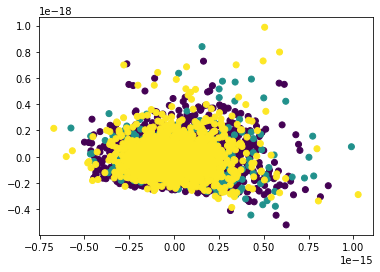

In [237]:

# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from sklearn import datasets
# from sklearn.decomposition import PCA

data = latent_vector.drop('category', axis=1)

# fig = plt.figure(figsize=(8, 6))
# ax = Axes3D(fig, elev=-150, azim=110)
# X_reduced = PCA(n_components=3).fit_transform(data)
# ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=latent_vector['category'],
#            cmap=plt.cm.Set1, edgecolor='k', s=40)
# ax.set_title("First three PCA directions")
# ax.set_xlabel("1st eigenvector")
# ax.w_xaxis.set_ticklabels([])
# ax.set_ylabel("2nd eigenvector")
# ax.w_yaxis.set_ticklabels([])
# ax.set_zlabel("3rd eigenvector")
# ax.w_zaxis.set_ticklabels([])

# plt.show()

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pc = pca.fit_transform(data)

import matplotlib.pyplot as plt
plt.scatter(pc[:,0],pc[:,1], c= latent_vector['category'])

In [238]:
data 

,0,1,2,3
0,1.0,1.811662e-14,2.878240e-14,1.593601e-14
1,1.0,1.813861e-14,2.882151e-14,1.596150e-14
2,1.0,1.819943e-14,2.893012e-14,1.603198e-14
3,1.0,1.814785e-14,2.883768e-14,1.597210e-14
4,1.0,1.819977e-14,2.893034e-14,1.603211e-14
...,...,...,...,...
9322,1.0,1.817410e-14,2.888458e-14,1.600247e-14
9323,1.0,1.812505e-14,2.879711e-14,1.594580e-14
9324,1.0,1.813539e-14,2.881547e-14,1.595773e-14
9325,1.0,1.817660e-14,2.888899e-14,1.600534e-14
